Dataset from kaggle:https://www.kaggle.com/datasets/abhinav89/telecom-customer?resource=download
Target variable is churn, the goal is to predict whether the customer will churn or not

In [46]:
# !pip install graphviz
import getpass
import os

password = getpass.getpass()
command = "sudo -S apt-get install graphviz" #can be any command but don't forget -S as it enables input from stdin
os.system('echo %s | %s' % (password, command))
# !sudo apt-get install graphviz

········


[sudo] password for anna: 

Reading package lists...
Building dependency tree...
Reading state information...
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


0

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RepeatedKFold, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from numpy import arange
from skfeature.function.similarity_based import fisher_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import graphviz
from sklearn import tree

In [48]:
data =  pd.read_csv('archive/Telecom_customer churn.csv')

In [49]:
data.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005


In [50]:
len(data)

100000

In [51]:
data.columns

Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou',
       'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean',
       'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean',
       'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean',
       'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean',
       'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean',
       'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean',
       'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean',
       'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean',
       'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean',
       'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'churn', 'months',
       'uniqsubs', 'actvsubs', 'new_cell', 'crclscod', 'asl_flag', 'totcalls',
       'totmou', 'totrev', 'adjrev'

In [52]:
data['Customer_ID'].nunique()

100000

In [53]:
data[ 'churn'].value_counts()

0    50438
1    49562
Name: churn, dtype: int64

Conclusion: The dataset is rather balanced

# Encoding categorical features

In [54]:
#Check wheather there are any columns containing string values
data.select_dtypes(include='O')

,new_cell,crclscod,asl_flag,prizm_social_one,area,dualband,refurb_new,hnd_webcap,ownrent,dwlltype,...,infobase,HHstatin,dwllsize,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd
0,U,A,N,S,NORTHWEST/ROCKY MOUNTAIN AREA,Y,N,WCMB,O,S,...,M,C,A,N,U,U,U,U,U,Y
1,N,EA,N,U,CHICAGO AREA,N,N,WC,NaN,S,...,M,C,A,Z,U,U,U,U,U,Y
2,Y,C,N,S,GREAT LAKES AREA,N,N,NaN,O,S,...,M,C,A,N,U,Y,U,U,U,Y
3,Y,B,N,T,CHICAGO AREA,N,N,NaN,NaN,M,...,M,C,D,U,Y,U,U,U,U,Y
4,Y,A,N,U,NEW ENGLAND AREA,Y,N,WCMB,R,M,...,M,C,O,I,U,U,U,U,U,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,U,B,N,U,LOS ANGELES AREA,N,N,WC,O,S,...,M,NaN,A,S,U,U,U,Y,U,Y
99996,U,CY,Y,S,LOS ANGELES AREA,N,N,WC,O,S,...,M,I,A,N,U,U,Y,Y,Y,Y
99997,U,DA,N,U,SOUTHWEST AREA,Y,N,WCMB,NaN,NaN,...,M,NaN,NaN,U,Y,Y,U,U,U,N
99998,U,EA,N,U,SOUTHWEST AREA,Y,N,WCMB,NaN,NaN,...,NaN,NaN,NaN,S,U,U,U,U,U,N


In [55]:
#Check wheather there are any columns containing bool values
data.select_dtypes(include='bool')

""
0
1
2
3
4
...
99995
99996
99997
99998


In [56]:
le = LabelEncoder()
label_encoded_df = data.copy()

#select all columns that contain strings
for col in label_encoded_df.select_dtypes(include='O').columns:
    label_encoded_df[col]=le.fit_transform(label_encoded_df[col])

In [57]:
#Dealing with NaNs

#Check how many NaN's there are
label_encoded_df.isna().sum()[50:]

# Replace NaN values with the mean of each column
label_encoded_df_na_replaced = label_encoded_df.fillna(label_encoded_df.mean())

In [58]:
#Scale the features
scaler=MinMaxScaler()
label_encoded_df_na_replaced_normalized = pd.DataFrame(scaler.fit_transform(label_encoded_df_na_replaced), columns=label_encoded_df_na_replaced.columns)

In [59]:
# separating features and a target variable
X = label_encoded_df_na_replaced_normalized.drop(['churn'], axis=1)
y = label_encoded_df_na_replaced_normalized.loc[:, 'churn']

In [143]:
label_encoded_df_na_replaced_normalized.to_csv('preprocessed_dataset.csv', index=False)

# Feature Importance

In [61]:
#Let's drop the customer id column, it doesn't make sense to use it as a feature
X.drop(['Customer_ID'], axis=1, inplace=True)

# Random Forrest importance

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
model = RandomForestClassifier(n_estimators=300)

In [64]:
#fit the model
model.fit(X, y)

#get the importances
importances=model.feature_importances_

In [65]:
X

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays
0,0.007836,0.017961,0.113102,0.001553,0.000000,0.000000,0.000000,0.000000,0.000000,0.105936,...,0.000000,0.0,0.529412,0.0,0.0,0.0,0.0,0.0,0.5,0.200219
1,0.016538,0.039548,0.147263,0.001553,0.005265,0.008255,0.010155,0.000000,0.000000,0.125583,...,0.000000,0.0,0.941176,0.0,0.0,0.0,0.0,0.0,0.5,0.134026
2,0.006016,0.000840,0.100491,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110296,...,0.000000,0.0,0.529412,0.0,0.5,0.0,0.0,0.0,0.5,0.825492
3,0.011474,0.000614,0.148579,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110374,...,0.200000,0.0,0.823529,0.5,0.0,0.0,0.0,0.0,0.5,0.993982
4,0.015950,0.046736,0.226354,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111514,...,0.933333,0.0,0.352941,0.0,0.0,0.0,0.0,0.0,0.5,0.240153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.016856,0.042072,0.167300,0.005576,0.009506,0.012300,0.014837,0.000617,0.000349,0.110020,...,0.000000,0.0,0.764706,0.0,0.0,0.0,0.5,0.0,0.5,0.425602
99996,0.016856,0.042072,0.167300,0.005576,0.009506,0.012300,0.014837,0.000617,0.000349,0.110020,...,0.000000,0.0,0.529412,0.0,0.0,0.5,0.5,0.5,0.5,0.459519
99997,0.016856,0.042072,0.167300,0.005576,0.009506,0.012300,0.014837,0.000617,0.000349,0.110020,...,1.000000,0.0,0.823529,0.5,0.5,0.0,0.0,0.0,0.0,0.239606
99998,0.016856,0.042072,0.167300,0.005576,0.009506,0.012300,0.014837,0.000617,0.000349,0.110020,...,1.000000,0.0,0.764706,0.0,0.0,0.0,0.0,0.0,0.0,0.043764


In [66]:
#visualize the results
results = pd.DataFrame({"Features": X.columns, 'Importances': importances})

results.set_index('Importances')

#sort
results =  results.sort_values("Importances")



Text(0, 0.5, 'Importances')

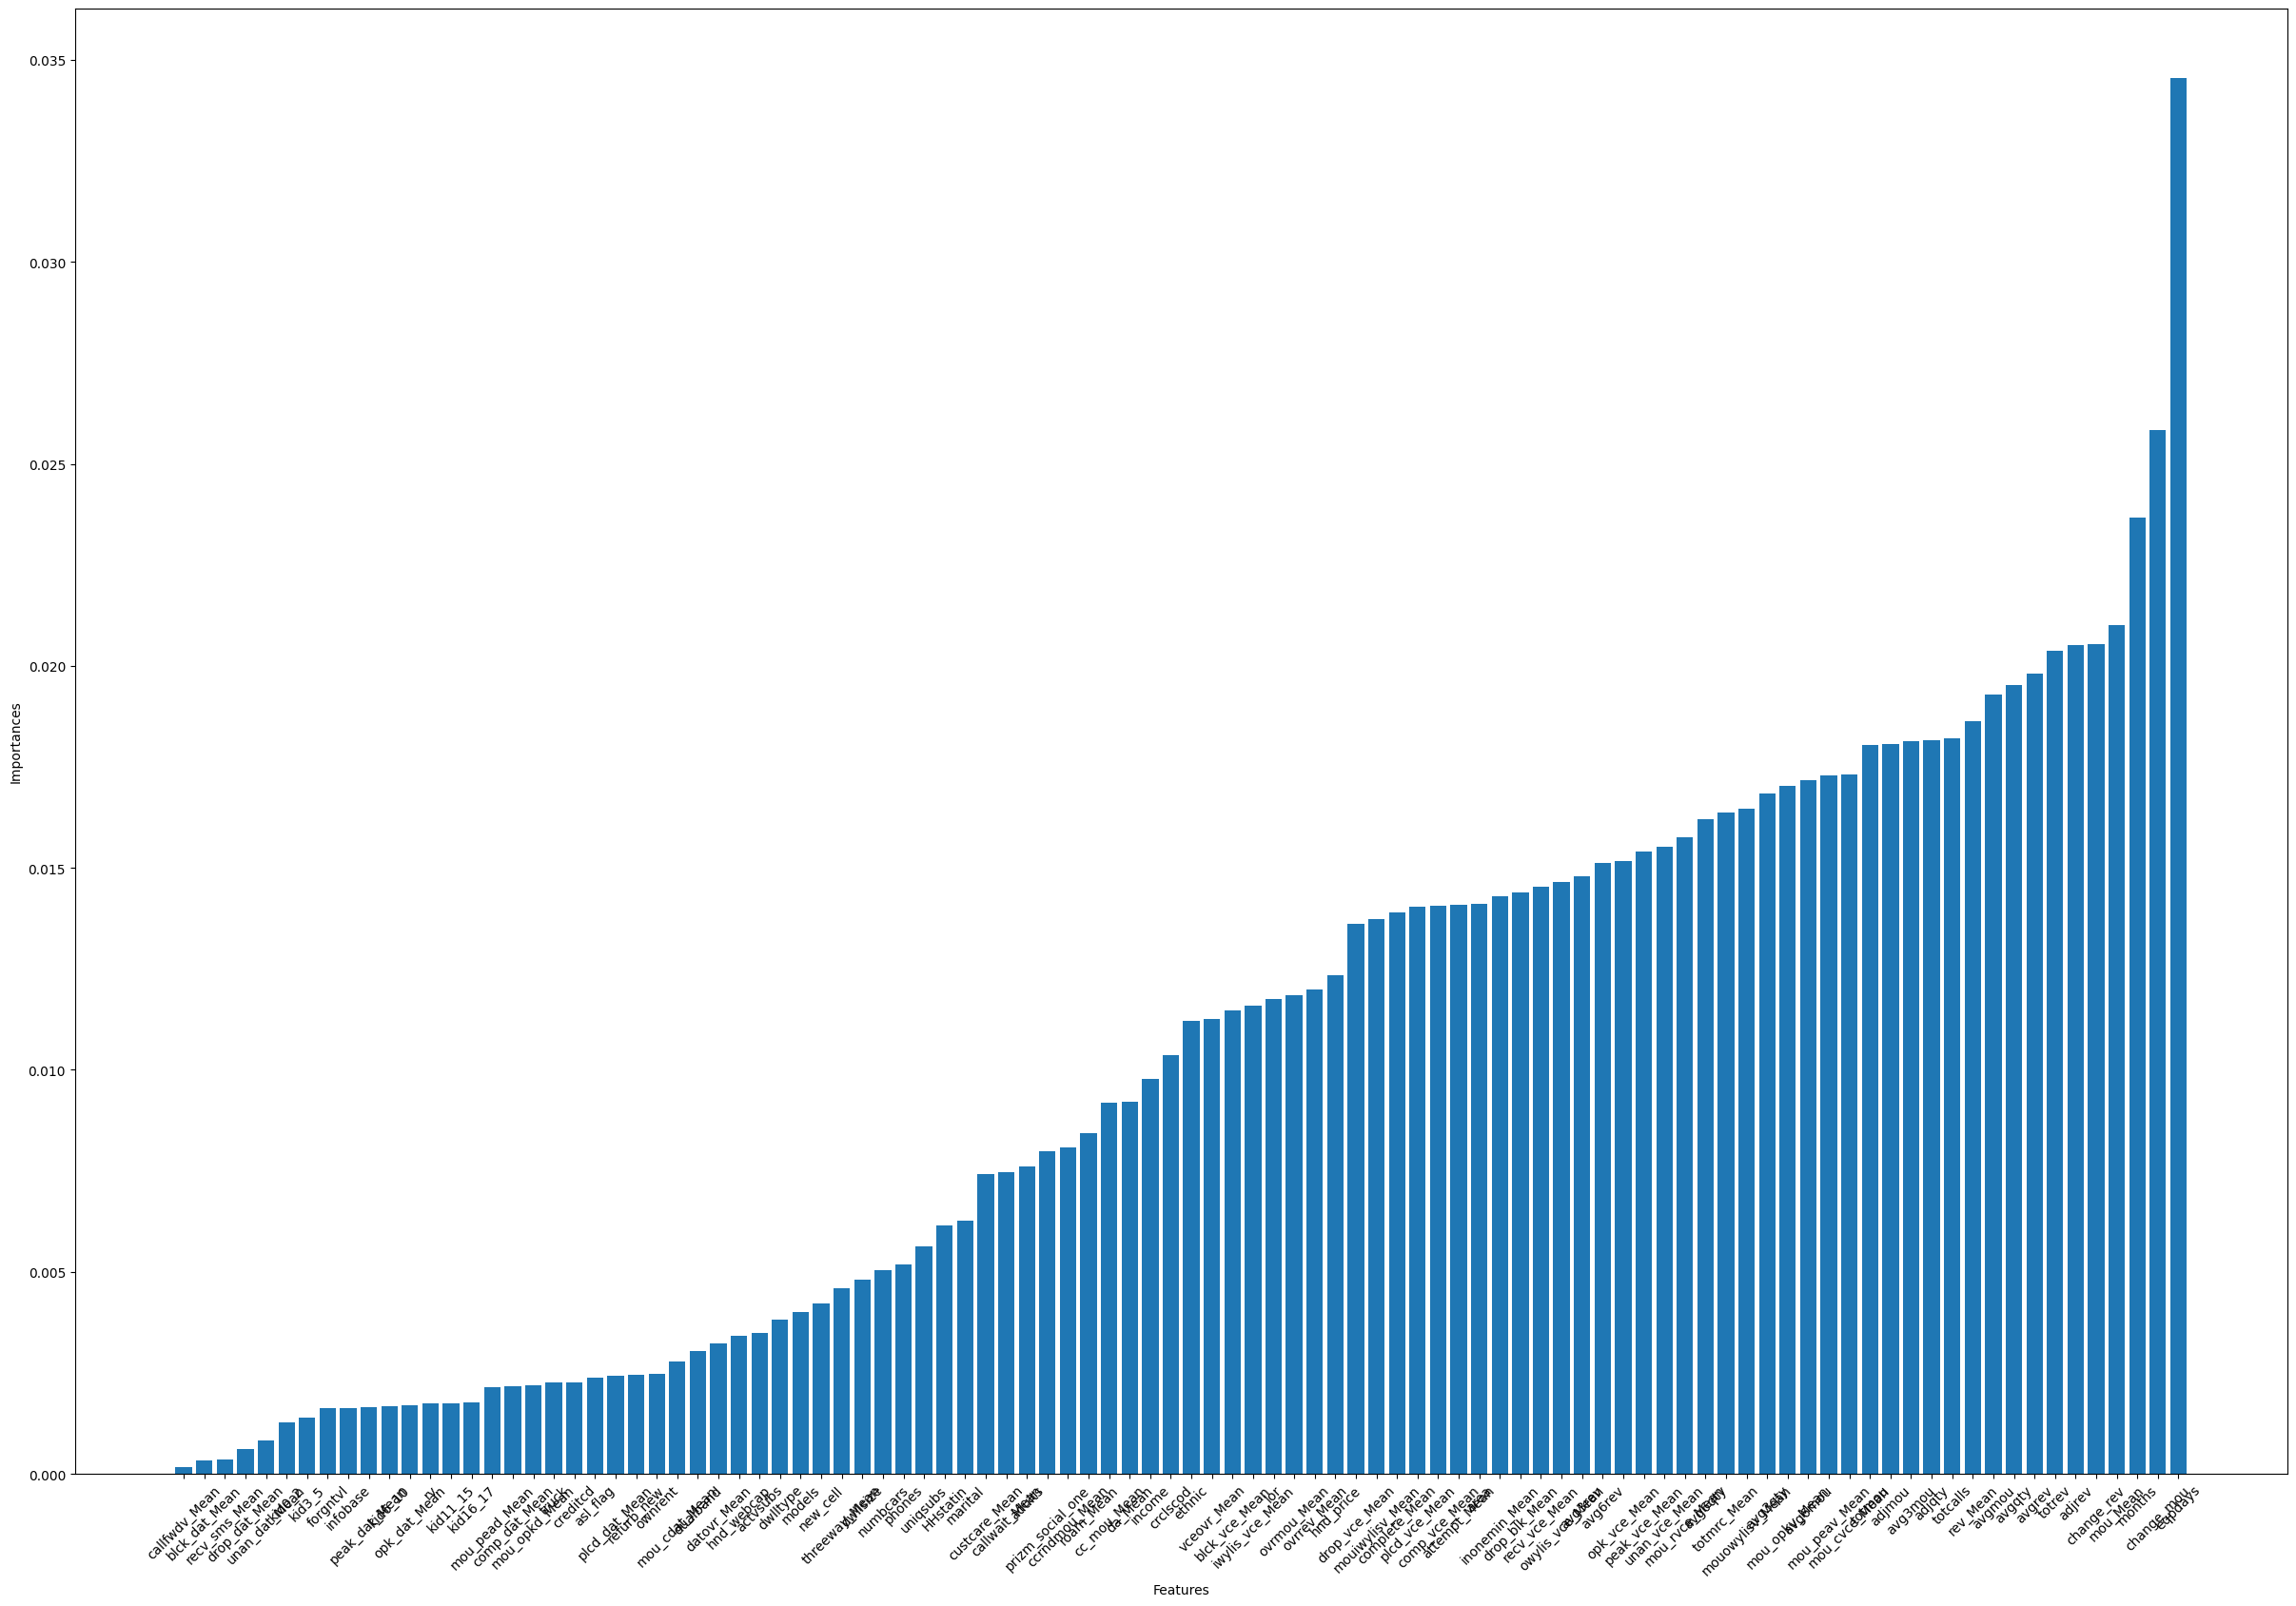

In [67]:
plt.figure(figsize=(30, 20))
plt.bar(results['Features'], results['Importances'])
plt.xlabel("Features")
plt.xticks(rotation=45)
plt.ylabel('Importances')

There are too many features to visualize them properly, but what we can conclude from this plot is theat the first three features have significantly higher importance than the other features

In [68]:
len(results.loc[results['Importances']> 0.01, :])

50

There are 50 features with importance > 0.01, we will drop all features with importance lower than that

In [69]:
top_50 = results.loc[results['Importances']> 0.01, :]

Text(0, 0.5, 'Importances')

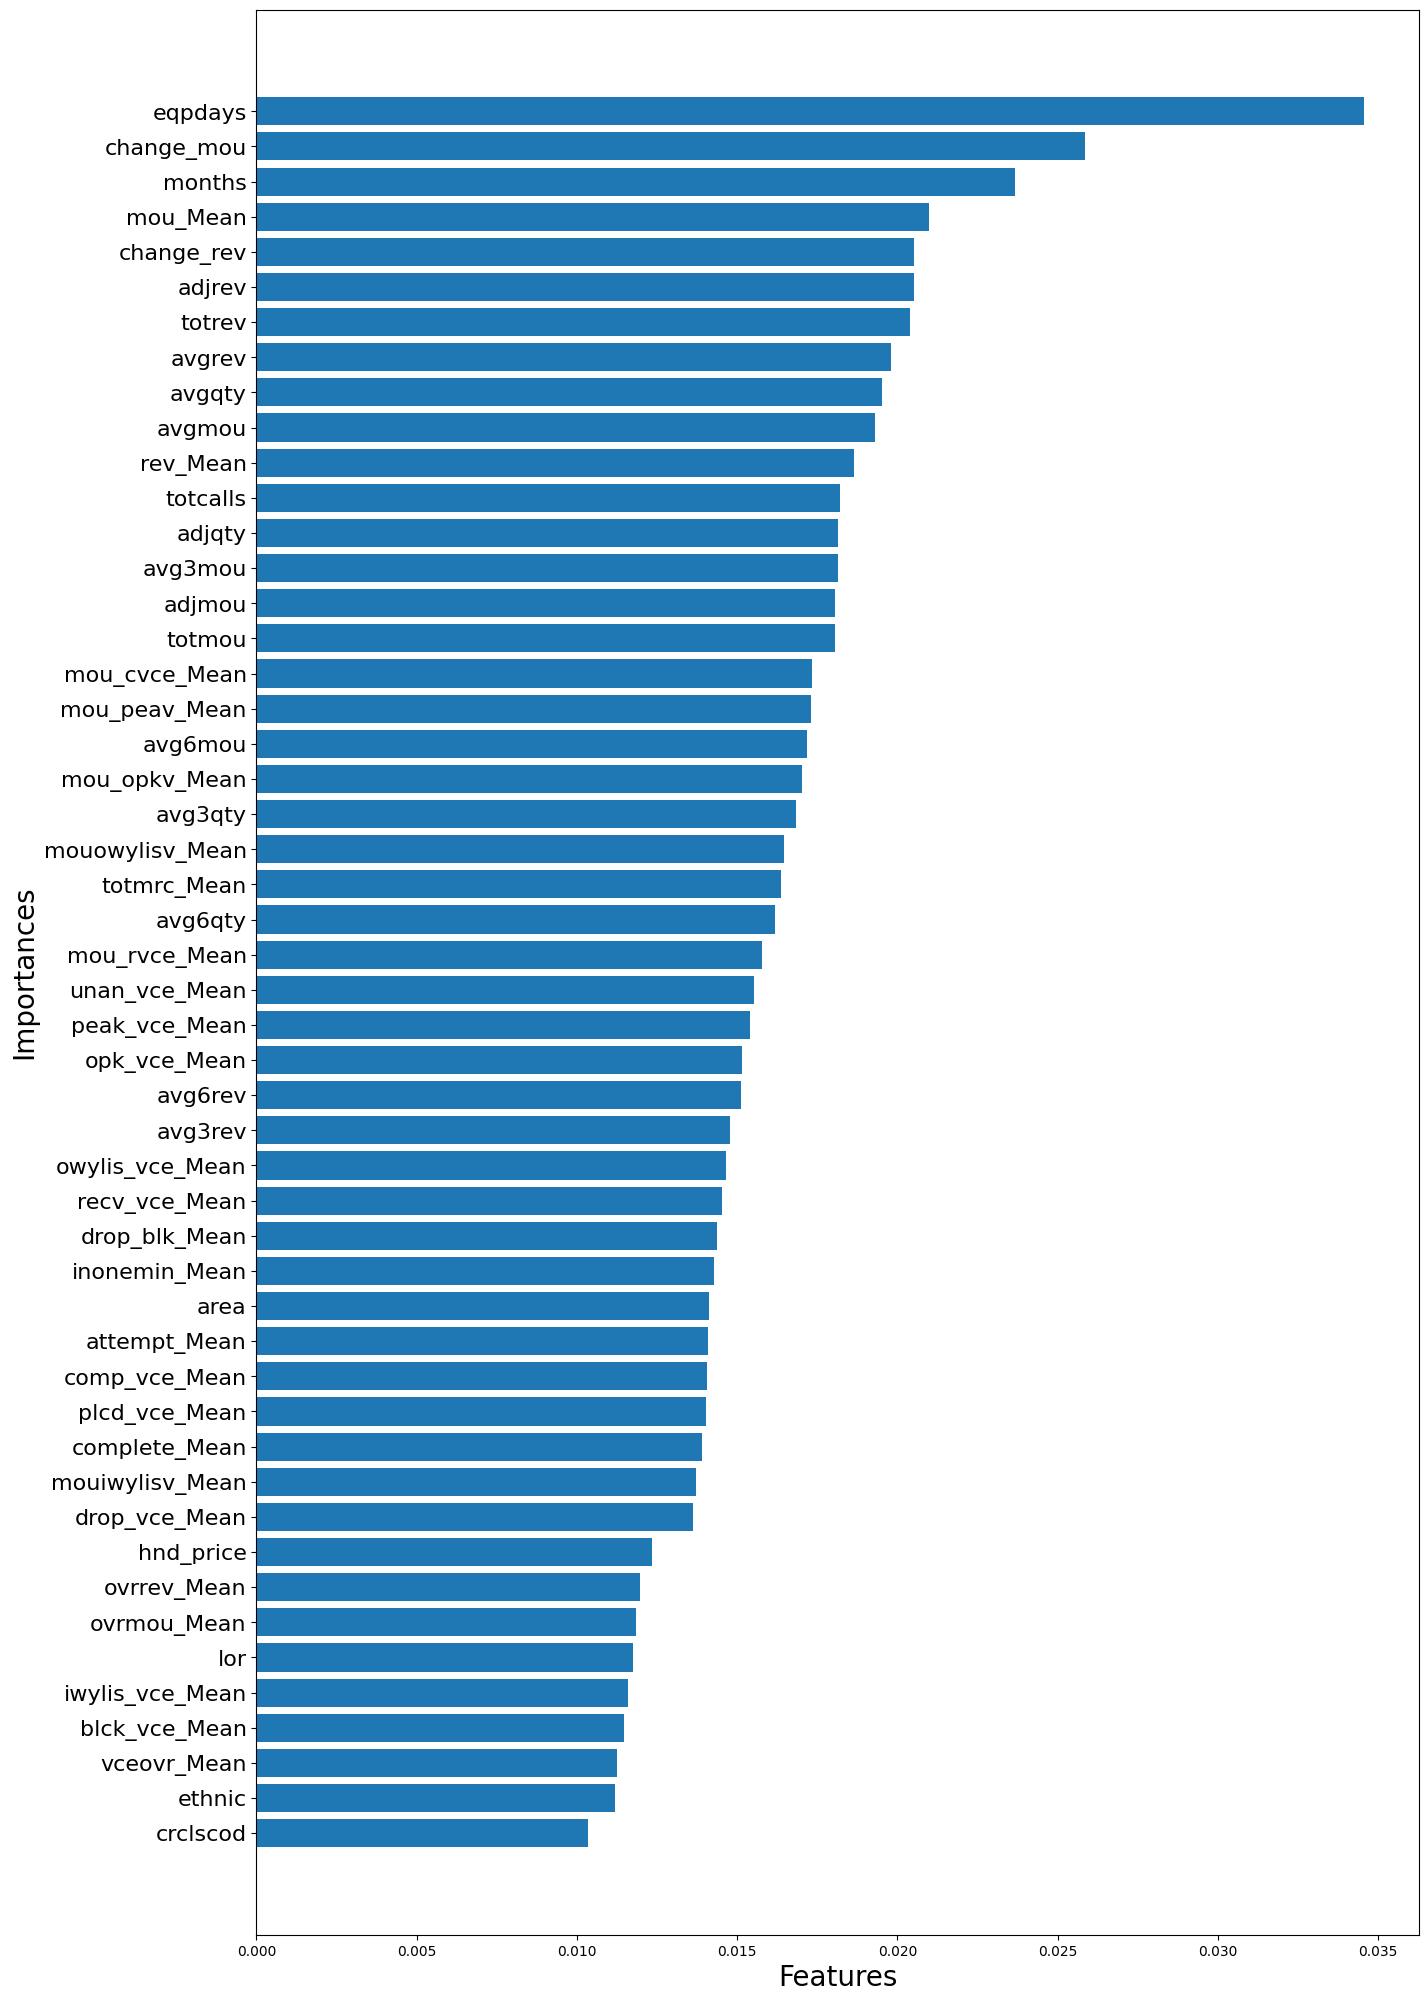

In [70]:
# Plotting 50 features
plt.figure(figsize=(15, 25))
plt.barh(top_50['Features'], top_50['Importances'])
plt.xlabel("Features", fontsize=20)
plt.yticks(fontsize=16)
plt.ylabel('Importances', fontsize=20)

The most important features are:
    1. Number of days (age) of current equipment
    2. Percentage change in monthly minutes of use vs previous three month average
    3. Total number of months in service
    4. Percentage change in monthly revenue vs previous three month average
    5. Mean number of monthly minutes of use

In [71]:
# selecting only those columns from the dataset which has importance >0.01

# creating list of columns selected
selected_cols = list(top_50['Features'].unique())

# adding target column
selected_cols = selected_cols + ['churn']

# selecting columns from the dataframe and assigning to a new dataframe
data2 = label_encoded_df_na_replaced_normalized.loc[:, selected_cols]

data2

,crclscod,ethnic,vceovr_Mean,blck_vce_Mean,iwylis_vce_Mean,lor,ovrmou_Mean,ovrrev_Mean,hnd_price,drop_vce_Mean,...,avgqty,avgrev,totrev,adjrev,change_rev,mou_Mean,months,change_mou,eqpdays,churn
0,0.000000,0.529412,0.000000,0.001730,0.000000,1.000000,0.000000,0.000000,0.285714,0.002865,...,0.010835,0.031587,0.054945,0.053605,0.098338,0.017961,1.000000,0.105936,0.200219,1.0
1,0.396226,0.941176,0.010155,0.002595,0.012195,0.066667,0.005265,0.008255,0.187522,0.035817,...,0.088127,0.055261,0.104255,0.104603,0.104660,0.039548,0.909091,0.125583,0.134026,0.0
2,0.132075,0.529412,0.000000,0.000000,0.000000,0.466667,0.000000,0.000000,0.040816,0.001433,...,0.046687,0.036870,0.078786,0.071376,0.100054,0.000840,0.945455,0.110296,0.825492,1.0
3,0.075472,0.823529,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.040816,0.000000,...,0.010212,0.043267,0.073112,0.071647,0.100054,0.000614,0.981818,0.110374,0.993982,0.0
4,0.000000,0.352941,0.000000,0.001730,0.001284,0.333333,0.000000,0.000000,0.285714,0.041547,...,0.026350,0.041362,0.079709,0.079947,0.100054,0.046736,0.927273,0.111514,0.240153,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.075472,0.764706,0.014837,0.000000,0.000000,1.000000,0.009506,0.012300,0.040816,0.008596,...,0.059202,0.079953,0.058247,0.057584,0.099962,0.042072,0.345455,0.110020,0.425602,1.0
99996,0.226415,0.529412,0.014837,0.002595,0.000000,0.600000,0.009506,0.012300,0.040816,0.012894,...,0.060140,0.078059,0.055402,0.053547,0.099962,0.042072,0.381818,0.110020,0.459519,0.0
99997,0.320755,0.823529,0.014837,0.000000,0.000000,0.411816,0.009506,0.012300,0.387755,0.000000,...,0.021597,0.059646,0.040679,0.038920,0.099962,0.042072,0.454545,0.110020,0.239606,0.0
99998,0.396226,0.764706,0.014837,0.001730,0.032092,0.411816,0.009506,0.012300,0.285714,0.080229,...,0.156584,0.133158,0.097575,0.095714,0.099962,0.042072,0.345455,0.110020,0.043764,0.0


In [72]:
#select only those column which have correlation with the target variable > 0.04
corrs = pd.DataFrame(data2.corr()['churn'].sort_values())
corrs_list = corrs.loc[abs(corrs['churn']) > 0.04, 'churn'].index.tolist()


data3 = data2.loc[:, corrs_list]
data3

,hnd_price,totmrc_Mean,mou_Mean,mou_cvce_Mean,complete_Mean,comp_vce_Mean,avg3mou,mou_opkv_Mean,attempt_Mean,plcd_vce_Mean,...,opk_vce_Mean,mou_peav_Mean,mou_rvce_Mean,avg3qty,avg6mou,owylis_vce_Mean,recv_vce_Mean,iwylis_vce_Mean,eqpdays,churn
0,0.285714,0.113102,0.017961,0.020078,0.023755,0.023755,0.035251,0.012730,0.022863,0.022863,...,0.014604,0.033023,0.029562,0.029675,0.044617,0.000000,0.012564,0.000000,0.200219,1.0
1,0.187522,0.147263,0.039548,0.041953,0.102059,0.102059,0.039528,0.039038,0.115043,0.115043,...,0.095538,0.018761,0.016816,0.040420,0.066094,0.071909,0.020479,0.012195,0.134026,0.0
2,0.040816,0.100491,0.000840,0.001202,0.003167,0.003167,0.001555,0.000054,0.003932,0.003932,...,0.000609,0.001293,0.000000,0.001791,0.001524,0.000000,0.000099,0.000000,0.825492,1.0
3,0.040816,0.148579,0.000614,0.001863,0.001936,0.001936,0.001037,0.001256,0.001602,0.001602,...,0.002231,0.000842,0.000126,0.000767,0.006928,0.000517,0.000396,0.000000,0.993982,0.0
4,0.285714,0.226354,0.046736,0.063182,0.072321,0.072321,0.072317,0.050275,0.097131,0.097131,...,0.054970,0.043203,0.032346,0.048862,0.081197,0.022763,0.028097,0.001284,0.240153,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.040816,0.167300,0.042072,0.021014,0.023931,0.023931,0.053136,0.016901,0.023882,0.023882,...,0.016227,0.005869,0.000613,0.030954,0.083553,0.004139,0.000890,0.000000,0.425602,1.0
99996,0.040816,0.167300,0.042072,0.022319,0.028154,0.028154,0.049508,0.000088,0.030290,0.030290,...,0.000609,0.030331,0.006514,0.032233,0.056810,0.010347,0.004551,0.000000,0.459519,0.0
99997,0.387755,0.167300,0.042072,0.000000,0.000000,0.000000,0.085796,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.021745,0.098656,0.000000,0.000000,0.000000,0.239606,0.0
99998,0.285714,0.167300,0.042072,0.124984,0.220306,0.220130,0.133618,0.058529,0.240716,0.240571,...,0.101826,0.159695,0.100659,0.115119,0.130664,0.085360,0.097052,0.032092,0.043764,0.0


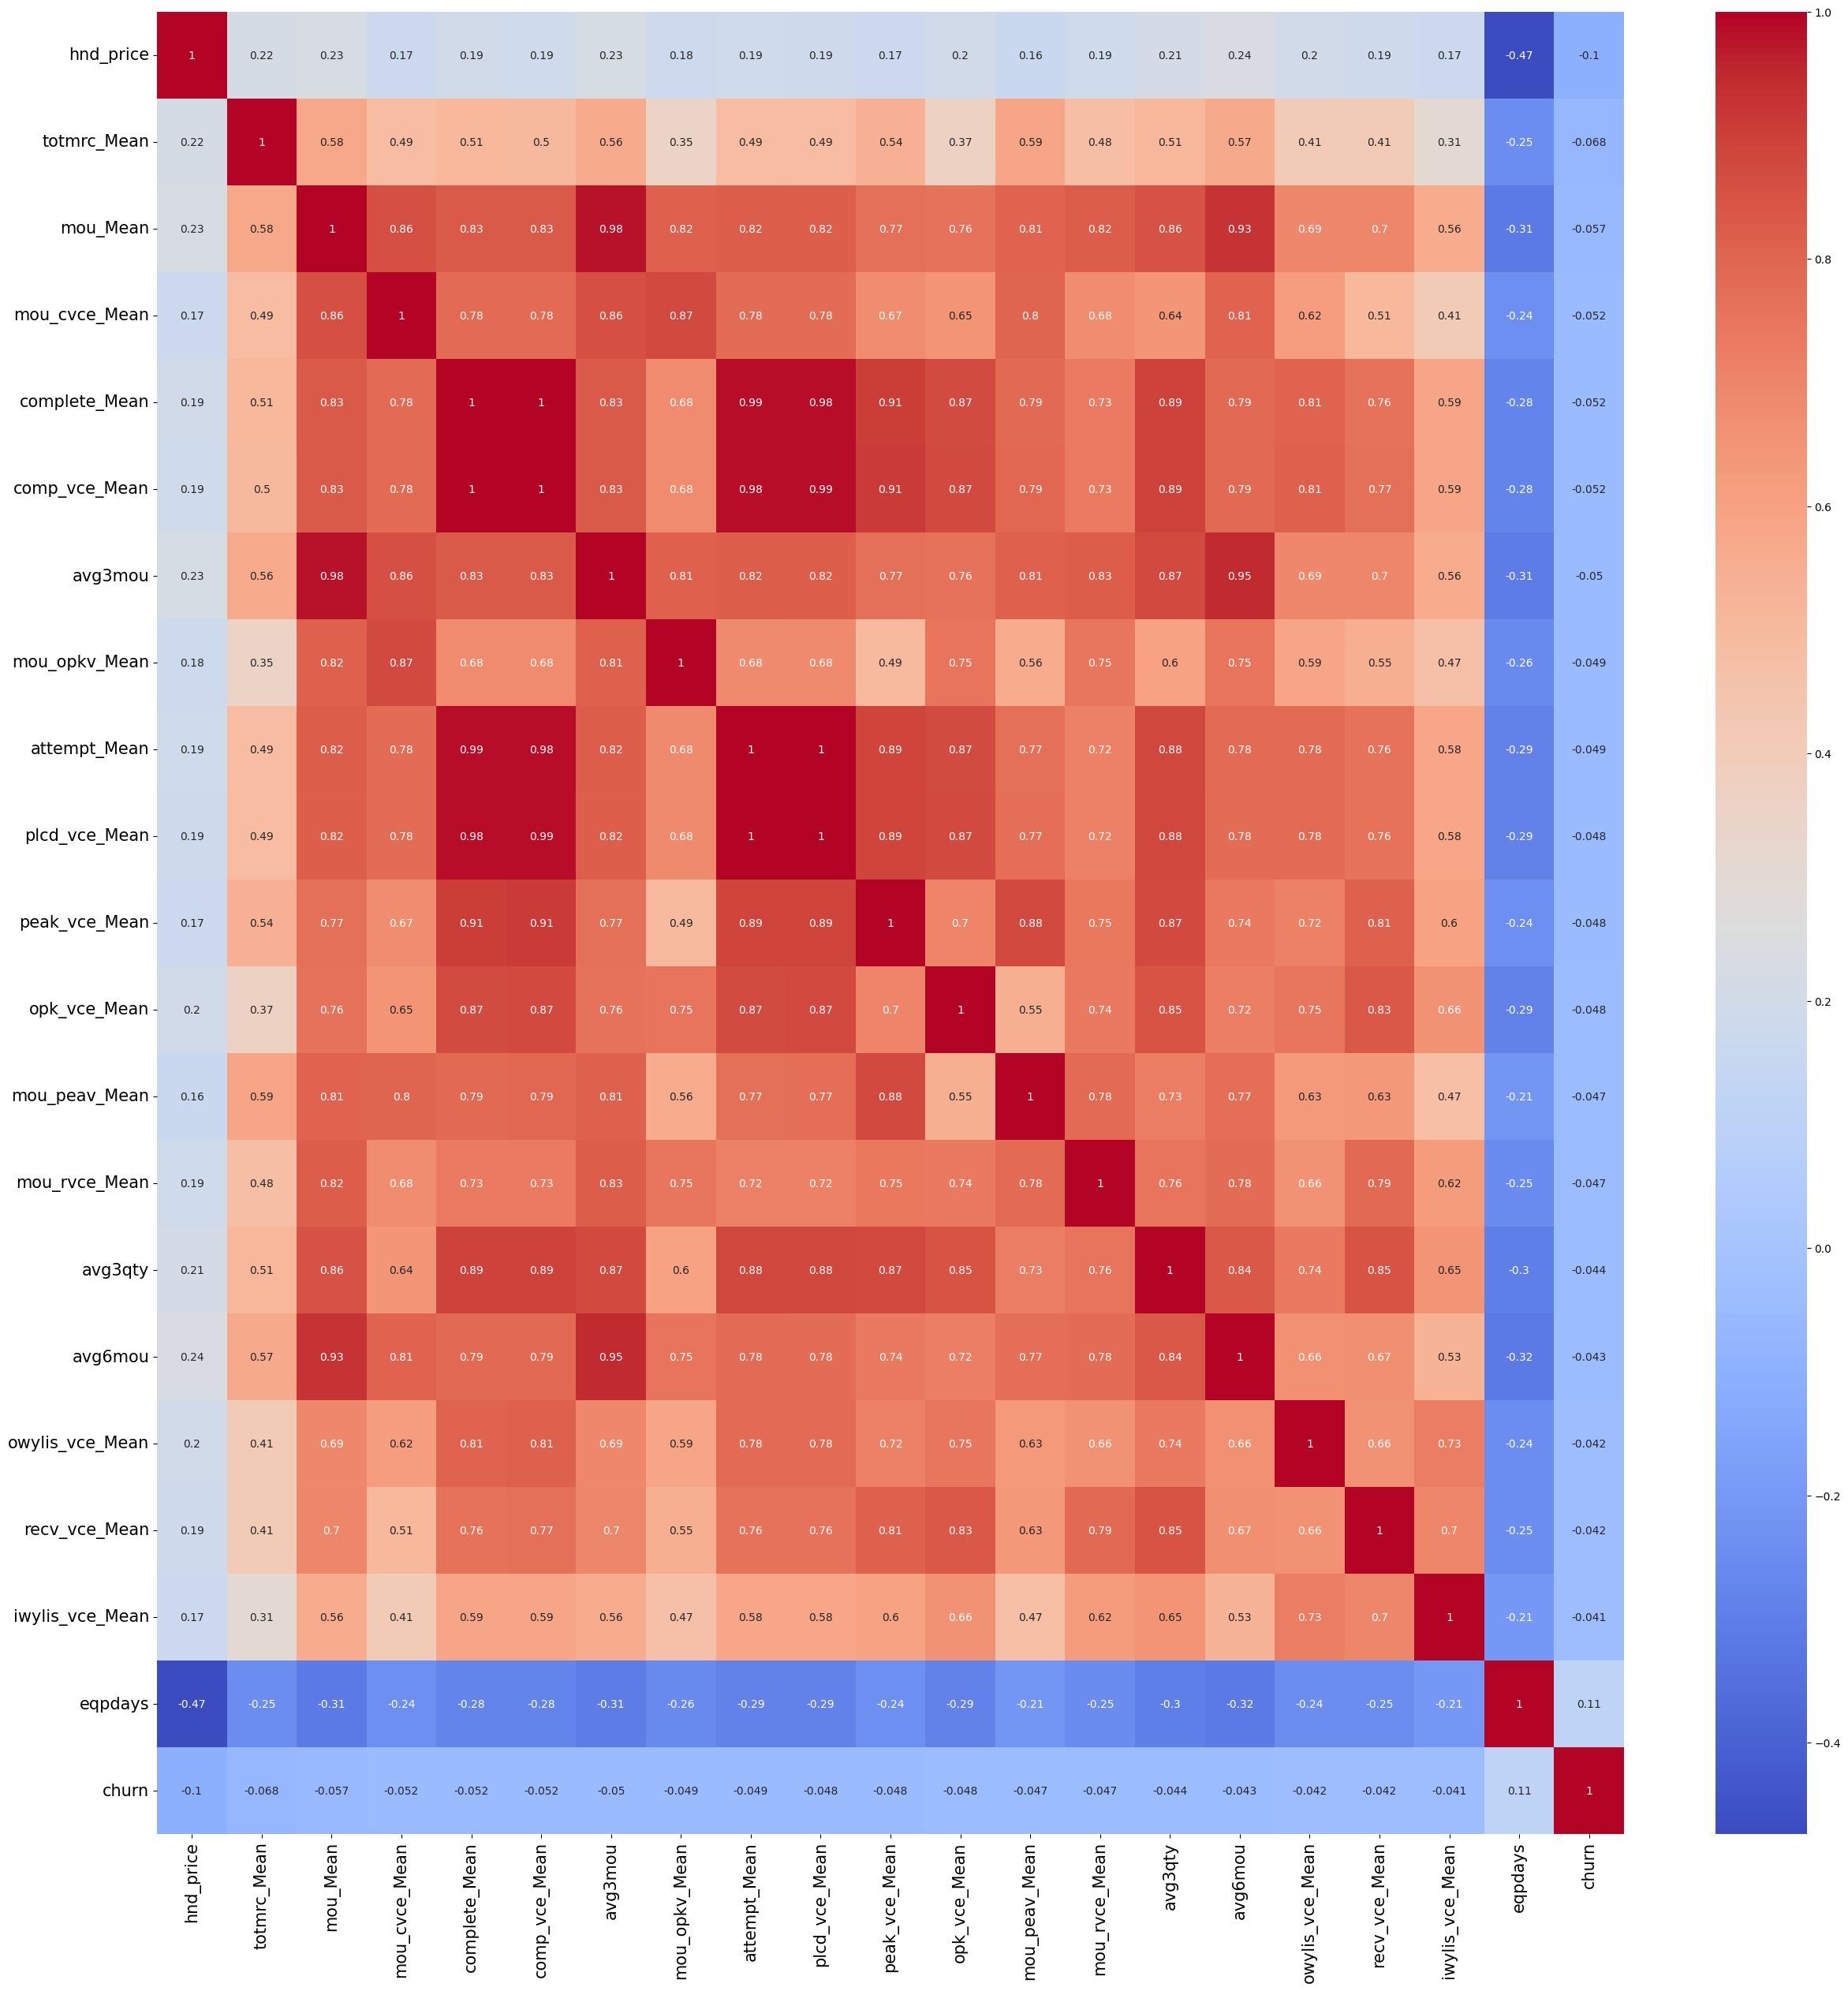

In [73]:
# Visualize correlation plot
correlation_matrix = data3.corr()


plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

In [74]:
data3.columns

Index(['hnd_price', 'totmrc_Mean', 'mou_Mean', 'mou_cvce_Mean',
       'complete_Mean', 'comp_vce_Mean', 'avg3mou', 'mou_opkv_Mean',
       'attempt_Mean', 'plcd_vce_Mean', 'peak_vce_Mean', 'opk_vce_Mean',
       'mou_peav_Mean', 'mou_rvce_Mean', 'avg3qty', 'avg6mou',
       'owylis_vce_Mean', 'recv_vce_Mean', 'iwylis_vce_Mean', 'eqpdays',
       'churn'],
      dtype='object')

In [75]:
abs(data3.corr()['churn']).sort_values()

iwylis_vce_Mean    0.040853
recv_vce_Mean      0.041779
owylis_vce_Mean    0.042065
avg6mou            0.043431
avg3qty            0.043883
mou_rvce_Mean      0.047148
mou_peav_Mean      0.047287
opk_vce_Mean       0.047873
peak_vce_Mean      0.048320
plcd_vce_Mean      0.048321
attempt_Mean       0.048533
mou_opkv_Mean      0.048896
avg3mou            0.049546
comp_vce_Mean      0.051574
complete_Mean      0.051740
mou_cvce_Mean      0.052042
mou_Mean           0.056925
totmrc_Mean        0.068434
hnd_price          0.102748
eqpdays            0.112691
churn              1.000000
Name: churn, dtype: float64

In [76]:
#Removing features which are highly correlated with other features
data3.drop(['avg6mou', 'avg3qty', 'attempt_Mean', 'plcd_vce_Mean', 'avg3mou', 'peak_vce_Mean', 'comp_vce_Mean'], axis=1, inplace=True)

# Train Test Split

In [77]:
X = data3.drop(['churn'], axis=1)
y = data3.loc[:, 'churn']

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=43, shuffle=True)

In [78]:
data3

,hnd_price,totmrc_Mean,mou_Mean,mou_cvce_Mean,complete_Mean,mou_opkv_Mean,opk_vce_Mean,mou_peav_Mean,mou_rvce_Mean,owylis_vce_Mean,recv_vce_Mean,iwylis_vce_Mean,eqpdays,churn
0,0.285714,0.113102,0.017961,0.020078,0.023755,0.012730,0.014604,0.033023,0.029562,0.000000,0.012564,0.000000,0.200219,1.0
1,0.187522,0.147263,0.039548,0.041953,0.102059,0.039038,0.095538,0.018761,0.016816,0.071909,0.020479,0.012195,0.134026,0.0
2,0.040816,0.100491,0.000840,0.001202,0.003167,0.000054,0.000609,0.001293,0.000000,0.000000,0.000099,0.000000,0.825492,1.0
3,0.040816,0.148579,0.000614,0.001863,0.001936,0.001256,0.002231,0.000842,0.000126,0.000517,0.000396,0.000000,0.993982,0.0
4,0.285714,0.226354,0.046736,0.063182,0.072321,0.050275,0.054970,0.043203,0.032346,0.022763,0.028097,0.001284,0.240153,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.040816,0.167300,0.042072,0.021014,0.023931,0.016901,0.016227,0.005869,0.000613,0.004139,0.000890,0.000000,0.425602,1.0
99996,0.040816,0.167300,0.042072,0.022319,0.028154,0.000088,0.000609,0.030331,0.006514,0.010347,0.004551,0.000000,0.459519,0.0
99997,0.387755,0.167300,0.042072,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.239606,0.0
99998,0.285714,0.167300,0.042072,0.124984,0.220306,0.058529,0.101826,0.159695,0.100659,0.085360,0.097052,0.032092,0.043764,0.0


# Modelling

## Logistic regerssion 

In [79]:
log_reg = LogisticRegression()

In [80]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [81]:
y_pred = log_reg.predict(X_test)

In [82]:
accuracy_lr = accuracy_score(y_test, y_pred)

print(f"Accuracy of Logistic Regression is :{accuracy_lr}")

Accuracy of Logistic Regression is :0.5573


## Decision Trees

In [83]:
clf = DecisionTreeClassifier()

In [84]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [85]:
y_pred = clf.predict(X_test)

In [86]:
accuracy_clf = accuracy_score(y_test, y_pred)

print(f"Accuracy of Decision Trees is :{accuracy_clf}")

Accuracy of Decision Trees is :0.53235


In [98]:
#Let's see the confuson matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

In [99]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

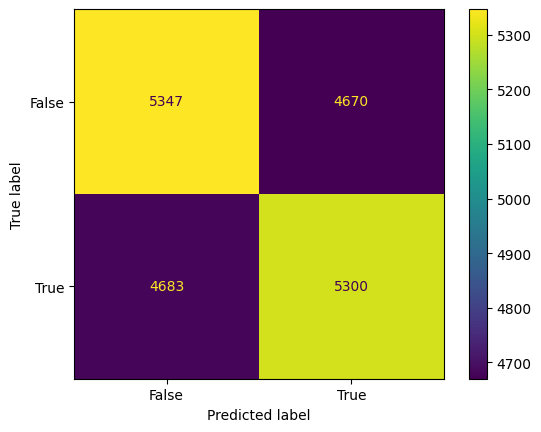

In [100]:
cm_display.plot()
plt.show()

In [118]:
# Prunning the tree, because it seems to overfit


#defining parameter grid
params={'max_depth':[2,4,6,8,10,12],'min_samples_split': [2,3,4,5], 'min_samples_leaf': [1, 2]}


clf=DecisionTreeClassifier()
search=GridSearchCV(estimator=clf, param_grid=params)
search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4, 5]})

In [121]:
print(search.best_estimator_)

DecisionTreeClassifier(max_depth=6, min_samples_split=4)


In [122]:
#Trying the best model
clf=search.best_estimator_

clf.fit(X_train, y_train)

preds = clf.predict(X_test)

accuracy = accuracy_score(y_test, preds)

print(f"Accuracy of a pruned tree : {accuracy}")

Accuracy of a pruned tree : 0.59265


## Random Forest

In [128]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [124]:
rf = RandomForestClassifier()

In [125]:
rf.fit(X_train, y_train)

preds = rf.predict(X_test)

accuracy = accuracy_score(y_test, preds)

print(f"Accuracy of a Random Forest : {accuracy}")

Accuracy of a pruned tree : 0.58435


In [135]:
# Lists of hyperparameters for GridSearch

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 100, num = 3)] 

# Number of features to consider at every split
max_features = ['sqrt', 'log2']

# Maximum number of levels in tree
max_depth = [2,4,6,8,10,12]

# Minimum number of samples required to split a node
min_samples_split = [2,3,4,5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

# Create the random grid
params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [136]:
finder = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params,
    scoring='accuracy',
    verbose=3,
    return_train_score=True
)

In [137]:
finder.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=0.594, test=0.591) total time=   3.1s
[CV 2/5] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=0.596, test=0.586) total time=   3.1s
[CV 3/5] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=0.593, test=0.589) total time=   3.0s
[CV 4/5] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=0.595, test=0.585) total time=   3.2s
[CV 5/5] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=0.593, test=0.588) total time=   3.9s
[CV 1/5] END max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=(train=0.609, test=0.593) total time=   9.5s
[CV 2/5]

In [139]:
finder.best_params_

{'n_estimators': 75,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 12}

In [142]:
rf = RandomForestClassifier(n_estimators=75,
 min_samples_split=3,
 min_samples_leaf=2,
 max_features='sqrt',
 max_depth=12)


rf.fit(X_train, y_train)

preds = rf.predict(X_test)

accuracy = accuracy_score(y_test, preds)

print(f"Accuracy of a tuned Random Forest : {accuracy}")

Accuracy of a tuned Random Forest : 0.5962
